### Goal: Determing if a candy bar is chocolate or not based on other factors.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Load dataset
df = pd.read_csv('/Users/tommylee/Desktop/Sample Problems/candy-data.csv')

# Take out first column since unneccessary. 
new_df = df.iloc[:,1::] 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9)
memory usage: 8.0 KB


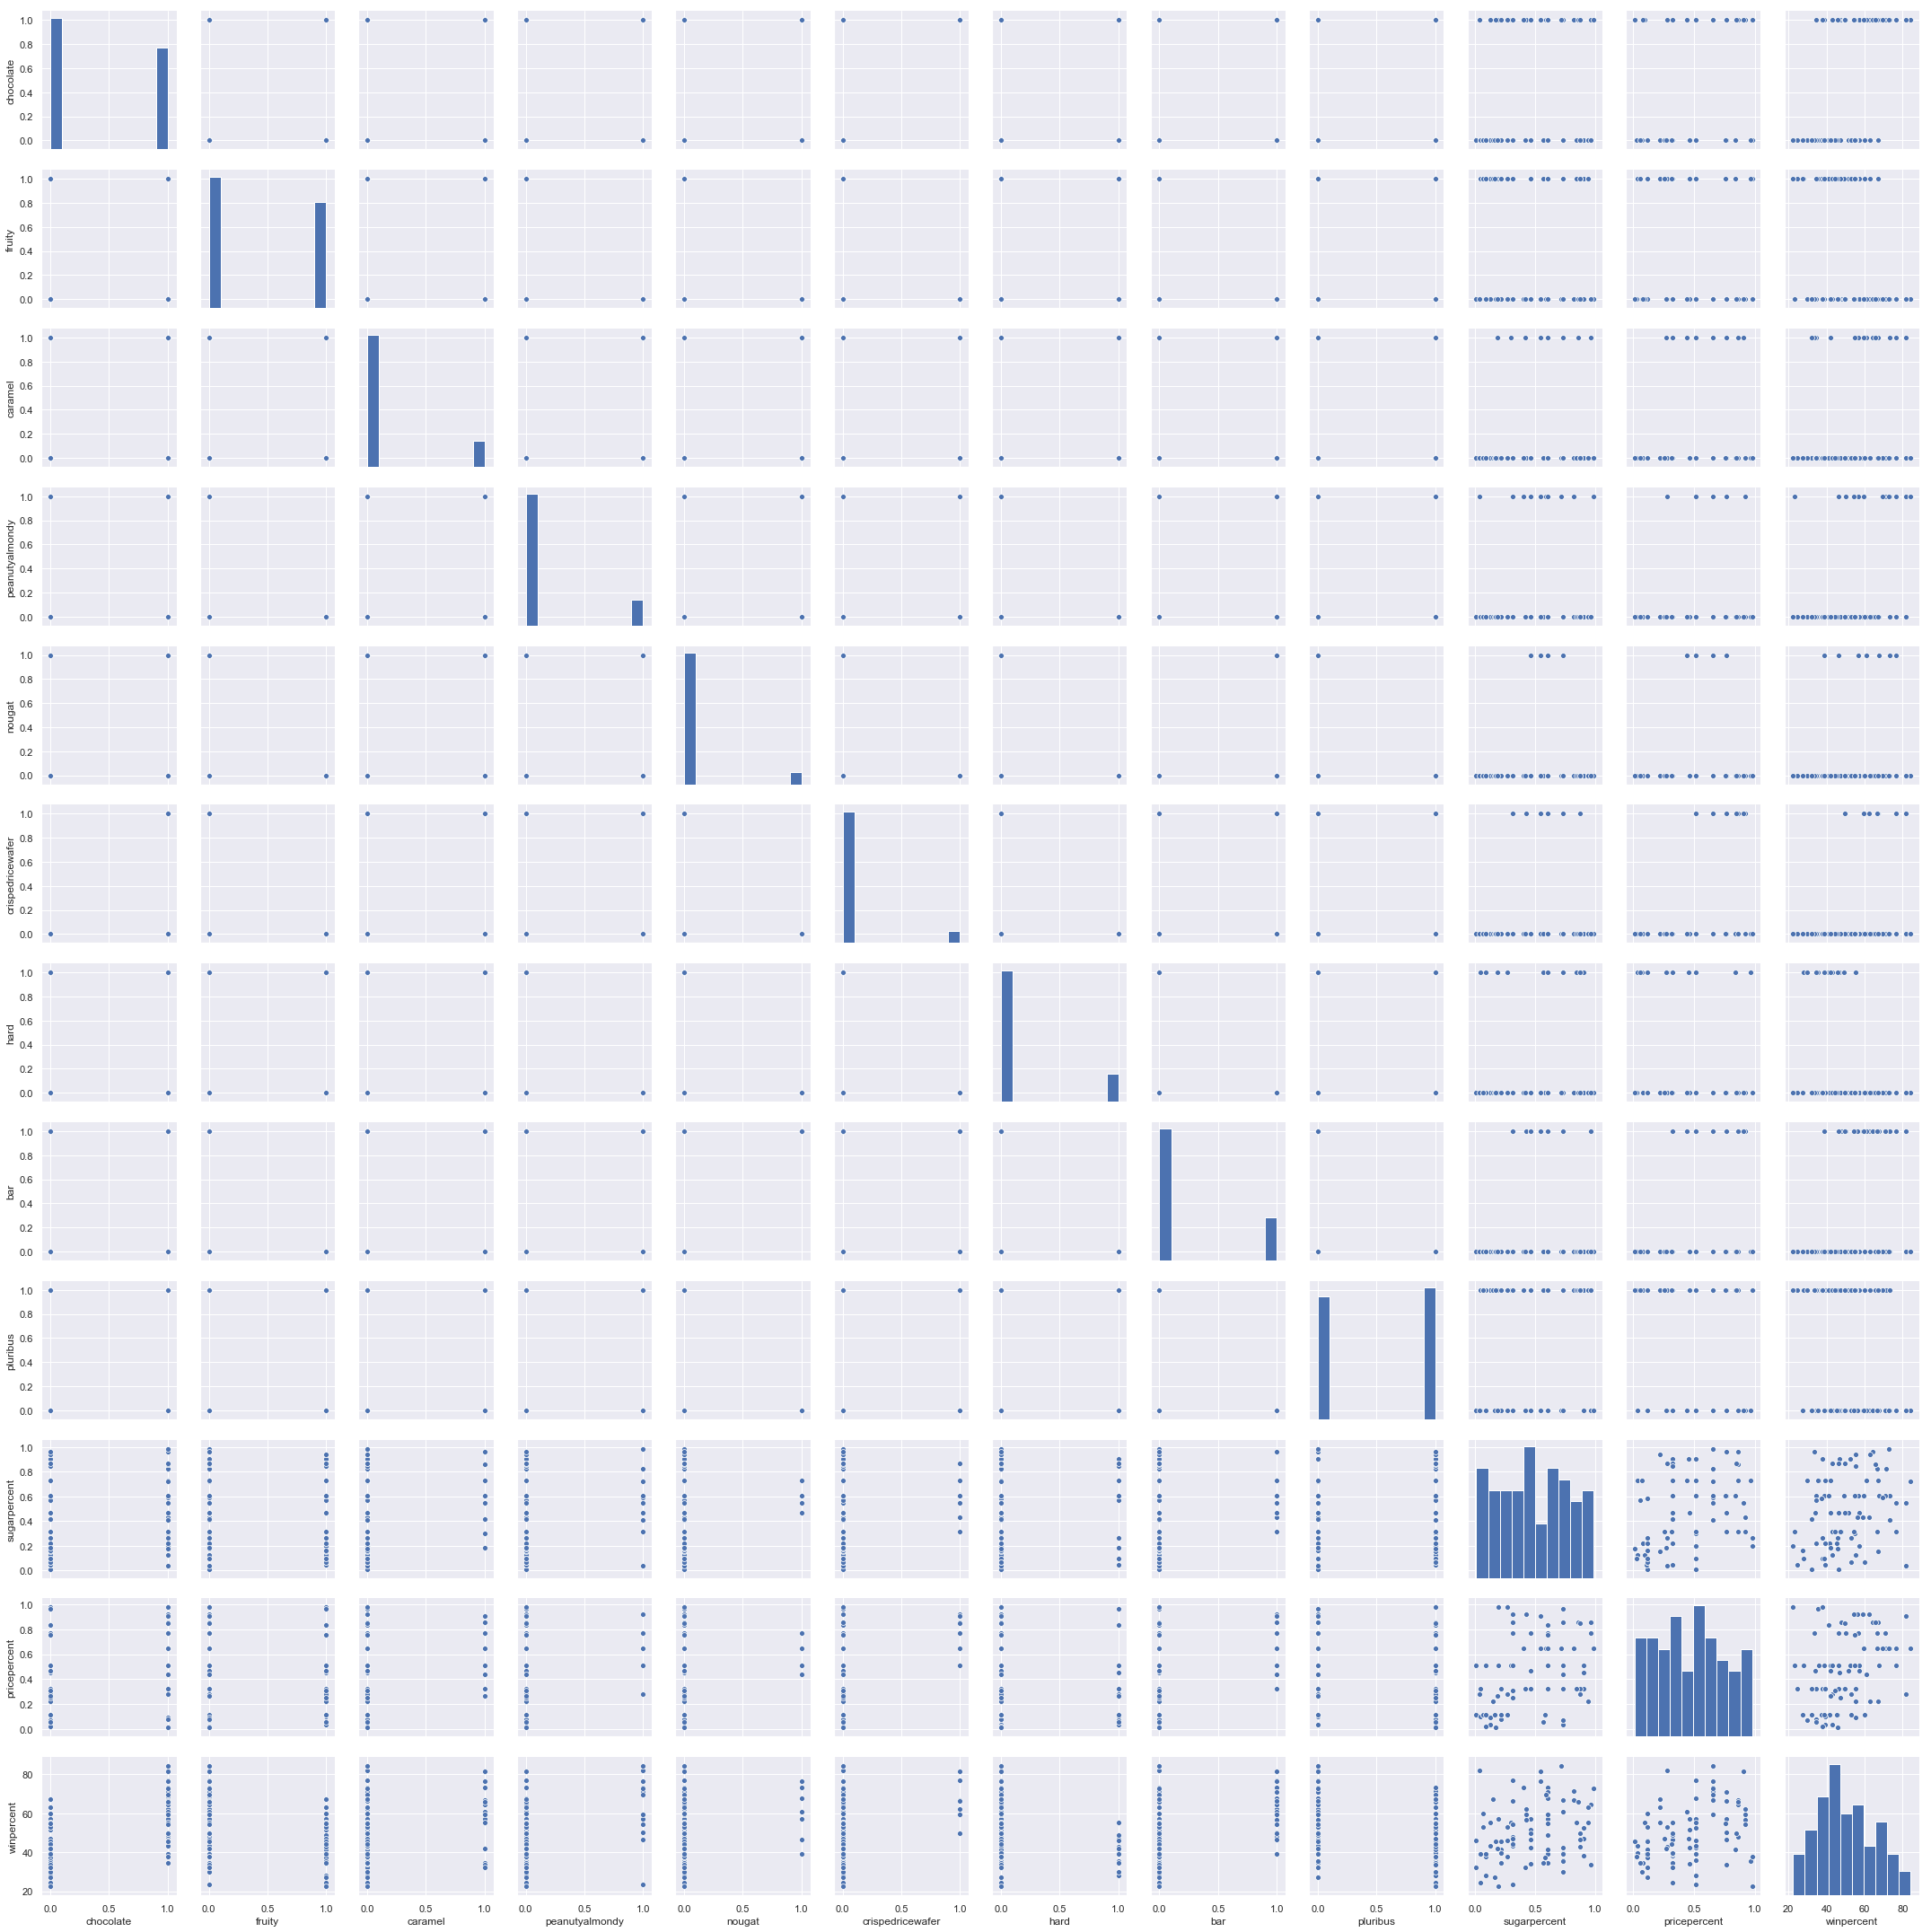

In [40]:
# Check distribution
sns.pairplot(new_df)

In [3]:
# Data is not normal. 
y = new_df['chocolate'].values # Make chocolate our target variable
X = new_df.iloc[:,1::] # Other variables
X.head(5)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [41]:
# Normalizing data set
norm_X = (X-np.min(X))/(np.max(X)-np.min(X))
norm_X.head(5)

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.737973,0.879793,0.721251
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.606960,0.518135,0.731475
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.108808,0.158998
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.518135,0.383432
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916070,0.518135,0.484266


In [42]:
# Split data into 60/40 train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Reshape into arrays.
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [47]:
# Fit logistic regression model for training set.
logreg = LogisticRegression()
model = logreg.fit(X_train,np.ravel(y_train))

# Get predicted values
y_pred = model.predict(X_test)

In [45]:
# Model intercept and coefficients.
model.intercept_,model.coef_[0]

(array([-1.30660487]),
 array([-2.58601597, -0.02005153,  0.04014614, -0.22218969,  0.22758235,
         0.06021104,  0.76539811, -0.58573533, -0.33920464,  0.04359088,
         0.05005379]))

In [44]:
# Trial accuracy by comparing predicted values to test values and then 
# seeing how many are True.
new_list = y_pred == y_test
new_list[0].tolist().count(True)/len(new_list[0].tolist())

0.5294117647058824

In [48]:
# Mean accuracy for test set and train set.
logreg.score(X_test,y_test),logreg.score(X_train,y_train)

(0.8823529411764706, 0.9117647058823529)